In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# New Antecedent/Consequent objects hold universe variables and membership functions
# Create the three fuzzy variables - two inputs, one output
temp_mambership  = ctrl.Antecedent(np.arange(0,80,0.1),"temperature") # Unit is fahrenheit
temp_rate_mambership = ctrl.Antecedent(np.arange(-50,50,1),"temperature_change_rate") # Rate of change of temperature = (Previous Temperature – CurrentTemperature)
fan_membership = ctrl.Consequent(np.arange(0,200,1),"fan_speed")

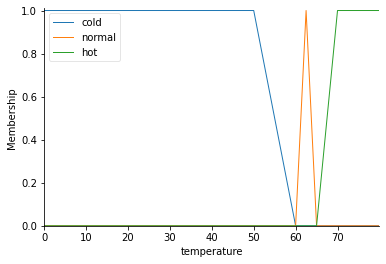

In [3]:
# Generate fuzzy membership functions for first input temperatur
temp_mambership['cold']   = fuzz.trapmf(temp_mambership.universe,[0,0,50,60]) 
temp_mambership['normal'] = fuzz.trimf(temp_mambership.universe,[60,62.5,65]) 
temp_mambership['hot']    = fuzz.trapmf(temp_mambership.universe,[65,70,80,80]) 
temp_mambership.view()

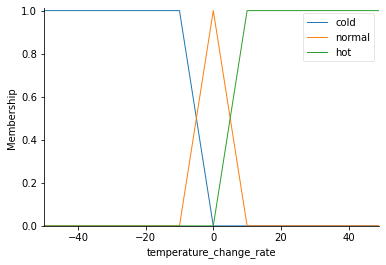

In [5]:
#Generate fuzzy membership functions for Second input rate of change of temperature
temp_rate_mambership['cold']   = fuzz.trapmf(temp_rate_mambership.universe,[-50,-50,-10,0]) 
temp_rate_mambership['normal'] = fuzz.trimf(temp_rate_mambership.universe,[-10,0,10]) 
temp_rate_mambership['hot']    = fuzz.trapmf(temp_rate_mambership.universe,[0,10,50,50]) 
temp_rate_mambership.view()

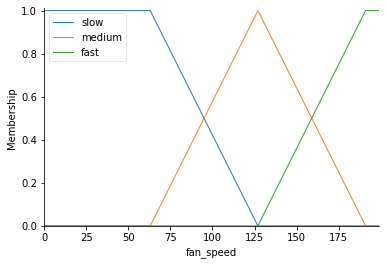

In [5]:
# Generate fuzzy membership functions for output speed
fan_membership['slow']   = fuzz.trapmf(fan_membership.universe,[0,0,63,127]) 
fan_membership['medium'] = fuzz.trimf(fan_membership.universe,[63,127,191]) 
fan_membership['fast']    = fuzz.trapmf(fan_membership.universe,[127,191,200,200]) 
fan_membership.view()

In [6]:
#Define Rules

rules = []
rules.append(ctrl.Rule(temp_mambership['cold'] | temp_rate_mambership['cold'], fan_membership['slow']))
rules.append(ctrl.Rule(temp_mambership['cold'] | temp_rate_mambership['normal'], fan_membership['medium']))
rules.append(ctrl.Rule(temp_mambership['cold'] | temp_rate_mambership['hot'], fan_membership['fast']))

rules.append(ctrl.Rule(temp_mambership['normal'] | temp_rate_mambership['cold'], fan_membership['medium']))
rules.append(ctrl.Rule(temp_mambership['normal'] | temp_rate_mambership['normal'], fan_membership['medium']))
rules.append(ctrl.Rule(temp_mambership['normal'] | temp_rate_mambership['hot'], fan_membership['fast']))

rules.append(ctrl.Rule(temp_mambership['hot'] | temp_rate_mambership['cold'], fan_membership['medium']))
rules.append(ctrl.Rule(temp_mambership['hot'] | temp_rate_mambership['normal'], fan_membership['fast']))
rules.append(ctrl.Rule(temp_mambership['hot'] | temp_rate_mambership['hot'], fan_membership['fast']))

In [7]:
# create a control system via:
fan_speed_ctrl = ctrl.ControlSystem(rules)

In [8]:
#In order to simulate this control system, we will create a ControlSystemSimulation. 
fan_speed_simu = ctrl.ControlSystemSimulation(fan_speed_ctrl)

In [9]:
fan_speed_simu.input['temperature'] = 26.5
fan_speed_simu.input['temperature_change_rate'] = 10
fan_speed_simu.compute()

In [10]:
fan_speed_simu.output['fan_speed']

94.23053892215569

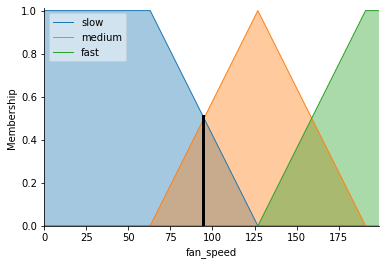

In [11]:
fan_membership.view(sim=fan_speed_simu)

In [12]:
# REF:
#      https://www.researchgate.net/profile/Tun-Tun-Win/publication/332098358_IoT_based_Hydroponic_Temperature_and_Humidity_Control_System_using_Fuzzy_Logic/links/5c9f80f1299bf11169520746/IoT-based-Hydroponic-Temperature-and-Humidity-Control-System-using-Fuzzy-Logic.pdf